In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xgboost import XGBClassifier
from scipy.stats import norm,chisquare
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [243]:
df = pd.read_csv('credit_risk_dataset.csv')

In [244]:
df.info() #Null values in person_emp_length and loan_int_rate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [110]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [245]:
df['loan_status'].value_counts()  #Imbalanced dataset with more skewness towards 0, with 0 being non default and 1 being default

0    25473
1     7108
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

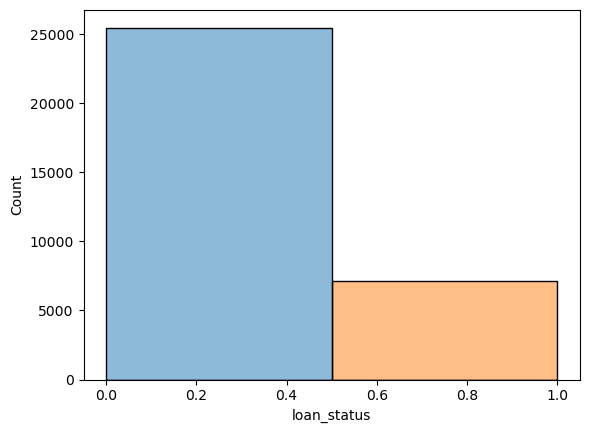

In [246]:
sns.histplot(data = df,x = df.loan_status,element="bars", hue = df.loan_status, bins=2, stat='count', legend=False)

In [247]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#WE APPROACH THIS DATASET IN MULTIPLE WAYS:
    
#1. We remove all the null value rows (deduction of dataset from 32581 entries to 28638 entries)


In [8]:
#Drop all null values in person_emp_length and loan_int_rate, and recheck distribution of classifier variable 

In [248]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [249]:
df = df.dropna(axis=0, subset=['loan_int_rate'])

In [251]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29465 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29465 non-null  int64  
 1   person_income               29465 non-null  int64  
 2   person_home_ownership       29465 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 29465 non-null  object 
 5   loan_grade                  29465 non-null  object 
 6   loan_amnt                   29465 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 29465 non-null  int64  
 9   loan_percent_income         29465 non-null  float64
 10  cb_person_default_on_file   29465 non-null  object 
 11  cb_person_cred_hist_length  29465 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


In [253]:
df = df.dropna(axis = 0, subset = ['person_emp_length'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [120]:
df['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

In [254]:
df.loan_status.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'  #Value counts for the classifier labels as percentages

0    78.3%
1    21.7%
Name: loan_status, dtype: object

In [255]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

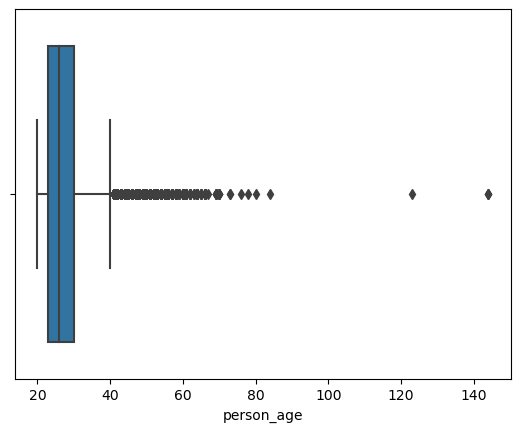

In [256]:
sns.boxplot(df['person_age'])

In [257]:
df[df['person_age']>70].count()  #Remove 10 people who were more than 70 years of age

person_age                    10
person_income                 10
person_home_ownership         10
person_emp_length             10
loan_intent                   10
loan_grade                    10
loan_amnt                     10
loan_int_rate                 10
loan_status                   10
loan_percent_income           10
cb_person_default_on_file     10
cb_person_cred_hist_length    10
dtype: int64

In [258]:
df = df[df['person_age'] <= 70]

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28628 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28628 non-null  int64  
 1   person_income               28628 non-null  int64  
 2   person_home_ownership       28628 non-null  object 
 3   person_emp_length           28628 non-null  float64
 4   loan_intent                 28628 non-null  object 
 5   loan_grade                  28628 non-null  object 
 6   loan_amnt                   28628 non-null  int64  
 7   loan_int_rate               28628 non-null  float64
 8   loan_status                 28628 non-null  int64  
 9   loan_percent_income         28628 non-null  float64
 10  cb_person_default_on_file   28628 non-null  object 
 11  cb_person_cred_hist_length  28628 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [260]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28628.000000,2.862800e+04,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000
mean,27.701306,6.643187e+04,4.786782,9657.148596,11.040087,0.216676,0.169514,5.789437
std,6.130424,5.155555e+04,4.148013,6329.854518,3.229637,0.411987,0.106392,4.028095
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

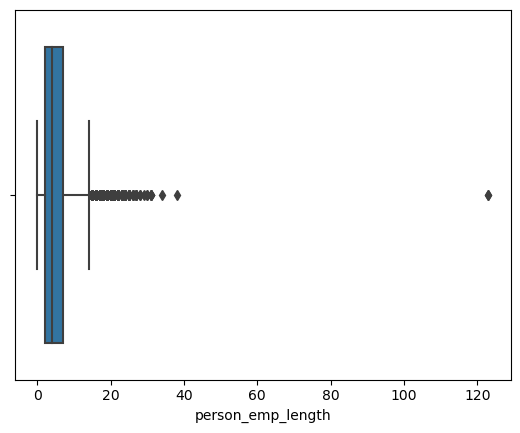

In [261]:
sns.boxplot(df['person_emp_length'])

In [262]:
df[df['person_emp_length']>30].count()

person_age                    8
person_income                 8
person_home_ownership         8
person_emp_length             8
loan_intent                   8
loan_grade                    8
loan_amnt                     8
loan_int_rate                 8
loan_status                   8
loan_percent_income           8
cb_person_default_on_file     8
cb_person_cred_hist_length    8
dtype: int64

In [263]:
df = df[df['person_emp_length']<100]

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28626 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28626 non-null  int64  
 1   person_income               28626 non-null  int64  
 2   person_home_ownership       28626 non-null  object 
 3   person_emp_length           28626 non-null  float64
 4   loan_intent                 28626 non-null  object 
 5   loan_grade                  28626 non-null  object 
 6   loan_amnt                   28626 non-null  int64  
 7   loan_int_rate               28626 non-null  float64
 8   loan_status                 28626 non-null  int64  
 9   loan_percent_income         28626 non-null  float64
 10  cb_person_default_on_file   28626 non-null  object 
 11  cb_person_cred_hist_length  28626 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [265]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28626.000000,2.862600e+04,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000
mean,27.701740,6.642775e+04,4.778523,9655.901977,11.040070,0.216656,0.169502,5.789597
std,6.130418,5.155199e+04,4.028743,6328.007742,3.229507,0.411974,0.106366,4.028188
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [266]:
lb = 7.900000 - 1.5 * (13.480000 - 7.900000)
ub = 13.480000 + 1.5 * (13.480000 - 7.900000)

In [267]:
ub

21.85

C:\Users\agniv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_int_rate'>

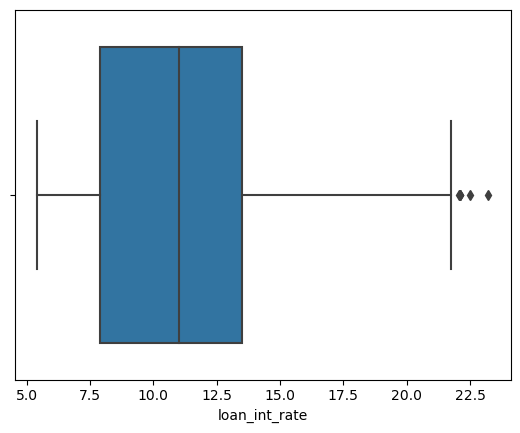

In [268]:
sns.boxplot(df['loan_int_rate'])

In [269]:
df[df['loan_int_rate']>21.85].count()

person_age                    6
person_income                 6
person_home_ownership         6
person_emp_length             6
loan_intent                   6
loan_grade                    6
loan_amnt                     6
loan_int_rate                 6
loan_status                   6
loan_percent_income           6
cb_person_default_on_file     6
cb_person_cred_hist_length    6
dtype: int64

In [270]:
df = df[df['loan_int_rate'] <= 21.85]

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28620 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28620 non-null  int64  
 1   person_income               28620 non-null  int64  
 2   person_home_ownership       28620 non-null  object 
 3   person_emp_length           28620 non-null  float64
 4   loan_intent                 28620 non-null  object 
 5   loan_grade                  28620 non-null  object 
 6   loan_amnt                   28620 non-null  int64  
 7   loan_int_rate               28620 non-null  float64
 8   loan_status                 28620 non-null  int64  
 9   loan_percent_income         28620 non-null  float64
 10  cb_person_default_on_file   28620 non-null  object 
 11  cb_person_cred_hist_length  28620 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [272]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28620.000000,2.862000e+04,28620.000000,28620.000000,28620.000000,28620.000000,28620.000000,28620.000000
mean,27.701468,6.642073e+04,4.778057,9655.321454,11.037699,0.216527,0.169504,5.789378
std,6.130656,5.153819e+04,4.028733,6327.731361,3.225686,0.411885,0.106369,4.028274
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,21.740000,1.000000,0.830000,30.000000


In [274]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [275]:
df['person_home_ownership'].value_counts()

RENT        14540
MORTGAGE    11794
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [150]:
df['loan_intent'].value_counts()

EDUCATION            5702
MEDICAL              5289
VENTURE              4996
PERSONAL             4873
DEBTCONSOLIDATION    4564
HOMEIMPROVEMENT      3196
Name: loan_intent, dtype: int64

In [276]:
df['loan_grade'].value_counts()

A    9397
B    9147
C    5697
D    3247
E     870
F     208
G      54
Name: loan_grade, dtype: int64

In [277]:
df['cb_person_default_on_file'].value_counts()

N    23524
Y     5096
Name: cb_person_default_on_file, dtype: int64

In [ ]:
#Change categorical variables using one hot encoding 

In [278]:
home_owner = pd.get_dummies(df['person_home_ownership'], drop_first=True)
loan_intent = pd.get_dummies(df['loan_intent'], drop_first=True)
loan_grade = pd.get_dummies(df['loan_grade'], drop_first=True)
def_on_file = pd.get_dummies(df['cb_person_default_on_file'], drop_first=True)

df = pd.concat([df, home_owner, loan_intent, loan_grade, def_on_file], axis = 1)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,0,1,0,0,0,0,0,0,0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28620 entries, 1 to 32580
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28620 non-null  int64  
 1   person_income               28620 non-null  int64  
 2   person_home_ownership       28620 non-null  object 
 3   person_emp_length           28620 non-null  float64
 4   loan_intent                 28620 non-null  object 
 5   loan_grade                  28620 non-null  object 
 6   loan_amnt                   28620 non-null  int64  
 7   loan_int_rate               28620 non-null  float64
 8   loan_status                 28620 non-null  int64  
 9   loan_percent_income         28620 non-null  float64
 10  cb_person_default_on_file   28620 non-null  object 
 11  cb_person_cred_hist_length  28620 non-null  int64  
 12  OTHER                       28620 non-null  uint8  
 13  OWN                         286

In [159]:
scaler = StandardScaler()

In [280]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'OTHER',
       'OWN', 'RENT', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL',
       'VENTURE', 'B', 'C', 'D', 'E', 'F', 'G', 'Y'],
      dtype='object')

In [281]:
X = df[['person_age', 'person_income',
       'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'OTHER',
       'OWN', 'RENT', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL',
       'VENTURE', 'B', 'C', 'D', 'E', 'F', 'G', 'Y']]
y = df['loan_status']

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [284]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
20883,27,44000,4.0,2000,13.35,0.05,5,0,1,0,...,0,1,0,0,1,0,0,0,0,0
6474,26,42000,8.0,6000,12.73,0.14,4,0,0,1,...,1,0,0,0,1,0,0,0,0,0
18561,29,54000,0.0,18000,10.99,0.33,6,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6870,23,73000,4.0,6000,12.53,0.08,4,0,0,1,...,1,0,0,1,0,0,0,0,0,0
29809,36,39000,8.0,7000,5.79,0.18,17,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [285]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20034 entries, 20883 to 14959
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  20034 non-null  int64  
 1   person_income               20034 non-null  int64  
 2   person_emp_length           20034 non-null  float64
 3   loan_amnt                   20034 non-null  int64  
 4   loan_int_rate               20034 non-null  float64
 5   loan_percent_income         20034 non-null  float64
 6   cb_person_cred_hist_length  20034 non-null  int64  
 7   OTHER                       20034 non-null  uint8  
 8   OWN                         20034 non-null  uint8  
 9   RENT                        20034 non-null  uint8  
 10  EDUCATION                   20034 non-null  uint8  
 11  HOMEIMPROVEMENT             20034 non-null  uint8  
 12  MEDICAL                     20034 non-null  uint8  
 13  PERSONAL                   

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
logmodel = LogisticRegression()

In [288]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [289]:
predictions = logmodel.predict(X_test)

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [291]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6765
           1       0.73      0.17      0.28      1821

    accuracy                           0.81      8586
   macro avg       0.77      0.58      0.58      8586
weighted avg       0.80      0.81      0.76      8586

[[6649  116]
 [1512  309]]
0.8103890053575589


In [292]:
#We find an accuracy of 81% from the baseline model, which is not a correct reflection of the data based on the fact, for 1, recall is very low compared to recall of 0, thereby no of false negatives is much higher, which can be attributed to the imbalance in the model

In [293]:
#We need to address the imbalance in the dataset, by adding class weights to the data 

In [294]:
# define class weights
w = {0:1, 1:3.618}

In [295]:
# define model
lg2 = LogisticRegression(random_state=101, class_weight= w)

In [296]:
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)

In [297]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.6850687165152574
Confusion Matrix: 
[[4454 2311]
 [ 393 1428]]
Area Under Curve: 0.7212866398545669
Recall score: 0.7841845140032949
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      6765
           1       0.38      0.78      0.51      1821

    accuracy                           0.69      8586
   macro avg       0.65      0.72      0.64      8586
weighted avg       0.81      0.69      0.71      8586



In [298]:
df['loan_status'].value_counts()

0    22423
1     6197
Name: loan_status, dtype: int64

In [299]:
#Class weight = balanced

In [300]:
# define model
lg2 = LogisticRegression(random_state=101, class_weight= 'balanced')

In [301]:
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)

In [302]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.7104588865595155
Confusion Matrix: 
[[4714 2051]
 [ 435 1386]]
Area Under Curve: 0.7289710704505576
Recall score: 0.7611202635914333
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      6765
           1       0.40      0.76      0.53      1821

    accuracy                           0.71      8586
   macro avg       0.66      0.73      0.66      8586
weighted avg       0.81      0.71      0.74      8586



In [ ]:
#Grid Search 

In [303]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [304]:
from sklearn.model_selection import GridSearchCV


In [305]:
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=101), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\agniv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\agniv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight='balanced', max_iter=200, random_state=101,
                   solver='newton-cg')


C:\Users\agniv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\agniv\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [306]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [213]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[5560 1205]
 [ 413 1408]] : is the confusion matrix 

0.8115536920568367 : is the accuracy score
0.5388442403367777 : is the precision score
0.7732015376166941 : is the recall score
0.6350924672981507 : is the f1 score


In [307]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Accuracy Score: 0.8115536920568367
Confusion Matrix: 
[[5560 1205]
 [ 413 1408]]
Area Under Curve: 0.797539423649441
Recall score: 0.7732015376166941
Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6765
           1       0.54      0.77      0.64      1821

    accuracy                           0.81      8586
   macro avg       0.73      0.80      0.75      8586
weighted avg       0.85      0.81      0.82      8586



In [308]:
from xgboost import XGBClassifier

In [309]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

C:\Users\agniv\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [310]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [311]:
y_pred = model.predict(X_test)

In [313]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Accuracy Score: 0.935825762869788
Confusion Matrix: 
[[6691   74]
 [ 477 1344]]
Area Under Curve: 0.8635586791692389
Recall score: 0.7380560131795717
Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6765
           1       0.95      0.74      0.83      1821

    accuracy                           0.94      8586
   macro avg       0.94      0.86      0.90      8586
weighted avg       0.94      0.94      0.93      8586



In [312]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.935825762869788